# Noise averaging behavior

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Summary

### Central Limit Theorem: 
No matter what kind of parent distribution (random, Gaussian, Poisson, or exponential) you have, the sampling distribution of "sample mean" will approach to "Normal distribution" while **sample size is large enough, usually we say n>30 to be a large sample size.** Note that for non-symmetric or other shapes of distribution, you may need a larger sample size. Also note that increasing the samples will not do much to the width/shape of the sampling distribution, **the shape of the sampling distribution is mainly determined by sample size**.


### What does this mean?
This means that for a given pixel, no matter what kind of noise was apply onto it, the sampling distribution of "mean value of this px" will approach to "Normal distribution" with standard deviation =$\sigma/\sqrt{n}$, n=sample size = total number of versions of this px with different noise.

"Mean value of this px" = Summing the pixels (and then divide by the total px number) = Class-averaging


### 01. Randam Noise

Mean of 100 noises = 49.86
STD of 100 noises = 27.61703097727922
Mean of 10000 means, each calculated from 100 noises = 49.936115
STD of 10000 means, each calculated from 100 noises = 2.8992468430223393


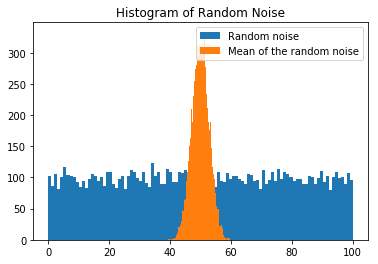

Wall time: 335 ms


In [2]:
%%time

avg_iter = 10000
size = 100
low=0
high=101
random_noise = np.random.randint(low=low,high = high,size = (size, avg_iter))
print('Mean of %s noises = %s' %(size ,np.mean(random_noise[:,0])))
print('STD of %s noises = %s' %(size, np.std(random_noise[:,0])))

random_mean_arr = np.mean(random_noise, axis=0)
random_std_arr = np.std(random_noise, axis=0)
print('Mean of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.mean(random_mean_arr)))
print('STD of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.std(random_mean_arr)))

plt.figure()
plt.title("Histogram of Random Noise")
plt.hist(random_noise[0], bins=101, label='Random noise')
plt.hist(random_mean_arr, bins=101, label='Mean of the random noise')
plt.legend()
plt.show()

### 02. Gaussian Noise

Mean of 100 noises = 46.6073563616382
STD of 100 noises = 23.943094504752953
Mean of 10000 means, each calculated form 100 noises = 49.97974752928843
STD of 10000 means, each calculated from 100 noises = 1.9957129631650996


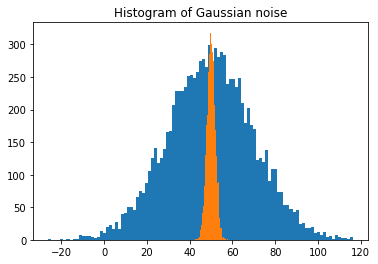

Wall time: 254 ms


In [3]:
%%time

avg_iter = 10000
size = 100
loc = 50
scale = 20
Gaussian_noise = np.random.normal(loc=loc, scale=scale, size=(size, avg_iter))
print('Mean of %s noises = %s' %(size ,np.mean(Gaussian_noise[:,0])))
print('STD of %s noises = %s' %(size, np.std(Gaussian_noise[:,0])))

Gaussian_mean_arr = np.mean(Gaussian_noise, axis=0)
Gaussian_std_arr = np.std(Gaussian_noise, axis=0)
print('Mean of %s means, each calculated form %s noises = %s' %(avg_iter, size, np.mean(Gaussian_mean_arr)))
print('STD of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.std(Gaussian_mean_arr)))


plt.figure()
plt.title("Histogram of Gaussian noise")
plt.hist(Gaussian_noise[0], bins=101, label='Gaussian noise')
plt.hist(Gaussian_mean_arr,bins=101, label='Mean of the Gaussian noise')
plt.show()

### 03. Poisson noise

Mean of 100 noises = 198.94
STD of 100 noises = 12.340842758904271
Mean of 10000 means, each calculated form 100 noises = 199.982773
STD of 10000 means, each calculated from 100 noises = 1.3985986988664763


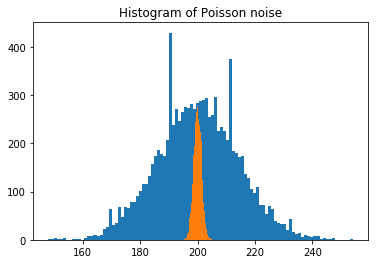

Wall time: 281 ms


In [4]:
%%time

avg_iter = 10000
size = 100
lam = 200 #For Poisson distribution, this is the event counts in unit time, which is also the expectation value
Poisson_noise = np.random.poisson(lam=lam, size=(size, avg_iter))
print('Mean of %s noises = %s' %(size ,np.mean(Poisson_noise[:,0])))
print('STD of %s noises = %s' %(size, np.std(Poisson_noise[:,0])))

Poisson_mean_arr = np.mean(Poisson_noise, axis=0)
Poisson_std_arr = np.std(Poisson_noise, axis=0)
print('Mean of %s means, each calculated form %s noises = %s' %(avg_iter, size, np.mean(Poisson_mean_arr)))
print('STD of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.std(Poisson_mean_arr)))


plt.figure()
plt.title("Histogram of Poisson noise")
plt.hist(Poisson_noise[0], bins=101, label='Poisson noise')
plt.hist(Poisson_mean_arr,bins=101, label='Mean of the Poisson noise')
plt.show()

### 04. Exponential noise

Mean of 100 noises = 10.377228389057827
STD of 100 noises = 9.435438318441138
Mean of 10000 means, each calculated form 100 noises = 10.001940054356837
STD of 10000 means, each calculated from 100 noises = 0.9921019768480492


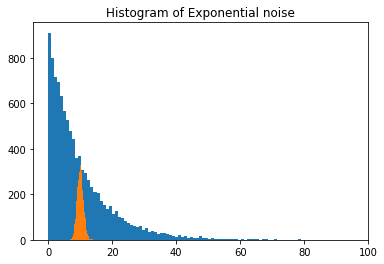

Wall time: 320 ms


In [13]:
%%time

avg_iter = 10000
size = 100
scale=10 
Exp_noise = np.random.exponential(scale=scale, size=(size, avg_iter))
print('Mean of %s noises = %s' %(size ,np.mean(Exp_noise[:,0])))
print('STD of %s noises = %s' %(size, np.std(Exp_noise[:,0])))

Exp_mean_arr = np.mean(Exp_noise, axis=0)
Exp_std_arr = np.std(Exp_noise, axis=0)
print('Mean of %s means, each calculated form %s noises = %s' %(avg_iter, size, np.mean(Exp_mean_arr)))
print('STD of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.std(Exp_mean_arr)))


plt.figure()
plt.title("Histogram of Exponential noise")
plt.hist(Exp_noise[0], bins=101, label='Exp noise')
plt.hist(Exp_mean_arr,bins=101, label='Mean of the Exp noise')
plt.show()

### 05. Compound noise

Mean of 200 noises = 105.23290521851435
STD of 200 noises = 95.04078507582064
Mean of 500 means, each calculated form 200 noises = 104.96632513655099
STD of 500 means, each calculated from 200 noises = 0.7724542102828069


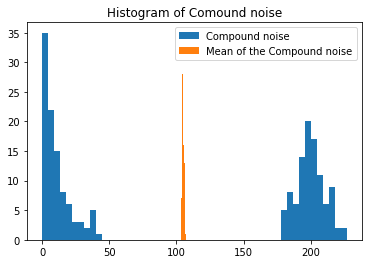

Wall time: 158 ms


In [25]:
%%time

avg_iter = 500
size = 200
scale=10 

a = np.random.exponential(scale=10, size=(size//2, avg_iter))
b = np.random.normal(loc=200, scale=10, size=(size//2, avg_iter))
Com_noise = np.concatenate((a,b), axis=0)
np.random.shuffle(Com_noise)    
    
print('Mean of %s noises = %s' %(size ,np.mean(Com_noise[:,0])))
print('STD of %s noises = %s' %(size, np.std(Com_noise[:,0])))

Com_mean_arr = np.mean(Com_noise, axis=0)
Com_std_arr = np.std(Com_noise, axis=0)
print('Mean of %s means, each calculated form %s noises = %s' %(avg_iter, size, np.mean(Com_mean_arr)))
print('STD of %s means, each calculated from %s noises = %s' %(avg_iter, size, np.std(Com_mean_arr)))


plt.figure()
plt.title("Histogram of Comound noise")
plt.hist(Com_noise[:,0], bins=51, label='Compound noise')
plt.hist(Com_mean_arr,bins=51, label='Mean of the Compound noise')
plt.legend()
plt.show()
